# Pandas Tutorial

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Basic

Most examples of this part come from pandas official web site.

### Object Creation

In [8]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
dates = pd.date_range('20171101', periods=6)
dates

DatetimeIndex(['2017-11-01', '2017-11-02', '2017-11-03', '2017-11-04',
               '2017-11-05', '2017-11-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2017-11-01,0.161302,-0.884511,1.019558,0.206350
2017-11-02,0.424379,0.017846,1.123321,-0.662370
2017-11-03,0.355312,0.311836,-0.945533,0.383736
2017-11-04,-0.343701,2.073255,0.837001,-0.561232
2017-11-05,0.739028,-1.027269,0.150436,0.834863
2017-11-06,0.046549,0.378016,1.188587,-0.336659


In [11]:
 df['2017-11-01':'2017-11-02']

,A,B,C,D
2017-11-01,0.161302,-0.884511,1.019558,0.20635
2017-11-02,0.424379,0.017846,1.123321,-0.66237


In [12]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20171101'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2017-11-01,1.0,3,test,foo
1,1.0,2017-11-01,1.0,3,train,foo
2,1.0,2017-11-01,1.0,3,test,foo
3,1.0,2017-11-01,1.0,3,train,foo


Can be referred as the following:

`
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.as_blocks          df2.convert_objects
df2.asfreq             df2.copy
df2.as_matrix          df2.corr
df2.astype             df2.corrwith
df2.at                 df2.count
df2.at_time            df2.cov
df2.axes               df2.cummax
df2.B                  df2.cummin
df2.between_time       df2.cumprod
df2.bfill              df2.cumsum
df2.blocks             df2.D
`

In [13]:
df2.E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): [test, train]

### Selection by Label¶

In [14]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df.loc[dates[0]]

A    2.454031
B   -0.113357
C   -1.343714
D    0.364402
Name: 2017-11-01 00:00:00, dtype: float64

In [15]:
df.loc[:,['A','B']]

,A,B
2017-11-01,2.454031,-0.113357
2017-11-02,0.412313,-2.242214
2017-11-03,-0.451412,0.163850
2017-11-04,-0.776008,0.271399
2017-11-05,1.921088,-0.246825
2017-11-06,-0.707453,-1.469997


In [16]:
df.loc['2017-11-01':'2017-11-02',['A','B']]

,A,B
2017-11-01,2.454031,-0.113357
2017-11-02,0.412313,-2.242214


In [17]:
df.loc['2017-11-01',['A','B']]

A    2.454031
B   -0.113357
Name: 2017-11-01 00:00:00, dtype: float64

In [18]:
df.loc[dates[0],'A']

2.4540311962785215

In [19]:
df.at[dates[0],'A']

2.4540311962785215

### Selection by Position¶

In [20]:
df.iloc[3]

A   -0.776008
B    0.271399
C    2.195059
D   -1.162768
Name: 2017-11-04 00:00:00, dtype: float64

In [21]:
df.iloc[3:5,0:2]

,A,B
2017-11-04,-0.776008,0.271399
2017-11-05,1.921088,-0.246825


In [22]:
df.iloc[[1,2,4],[0,2]]

,A,C
2017-11-02,0.412313,-0.325839
2017-11-03,-0.451412,0.505954
2017-11-05,1.921088,-0.195473


In [23]:
df.iloc[1:3,:]

,A,B,C,D
2017-11-02,0.412313,-2.242214,-0.325839,0.196198
2017-11-03,-0.451412,0.163850,0.505954,2.112181


In [24]:
df.iloc[:,1:3]

,B,C
2017-11-01,-0.113357,-1.343714
2017-11-02,-2.242214,-0.325839
2017-11-03,0.163850,0.505954
2017-11-04,0.271399,2.195059
2017-11-05,-0.246825,-0.195473
2017-11-06,-1.469997,-0.846284


In [25]:
df.iloc[1,1]

-2.2422139707406559

In [26]:
df.iat[1,1]

-2.2422139707406559

### Boolean Indexing

In [27]:
df[df.A > 0]

,A,B,C,D
2017-11-01,2.454031,-0.113357,-1.343714,0.364402
2017-11-02,0.412313,-2.242214,-0.325839,0.196198
2017-11-05,1.921088,-0.246825,-0.195473,1.118809


In [28]:
df[df > 0]

,A,B,C,D
2017-11-01,2.454031,NaN,NaN,0.364402
2017-11-02,0.412313,NaN,NaN,0.196198
2017-11-03,NaN,0.163850,0.505954,2.112181
2017-11-04,NaN,0.271399,2.195059,NaN
2017-11-05,1.921088,NaN,NaN,1.118809
2017-11-06,NaN,NaN,NaN,0.205523


In [29]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2017-11-03,-0.451412,0.163850,0.505954,2.112181,two
2017-11-05,1.921088,-0.246825,-0.195473,1.118809,four


## Setting

In [30]:
# Setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20180102', periods=6))
s1

2018-01-02    1
2018-01-03    2
2018-01-04    3
2018-01-05    4
2018-01-06    5
2018-01-07    6
Freq: D, dtype: int64

In [31]:
# Setting values by label, position, by assigning with a numpy array
df['A'] = s1
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:,'D'] = np.array([5] * len(df))

### Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. 

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [32]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2017-11-01,0.0,0.000000,-1.343714,5,1.0
2017-11-02,NaN,-2.242214,-0.325839,5,1.0
2017-11-03,NaN,0.163850,0.505954,5,NaN
2017-11-04,NaN,0.271399,2.195059,5,NaN


In [33]:
df2  =df1.dropna(how='any')
df2

,A,B,C,D,E
2017-11-01,0.0,0.0,-1.343714,5,1.0


### Filling missing data

In [34]:
df1.fillna(value=5)

,A,B,C,D,E
2017-11-01,0.0,0.000000,-1.343714,5,1.0
2017-11-02,5.0,-2.242214,-0.325839,5,1.0
2017-11-03,5.0,0.163850,0.505954,5,5.0
2017-11-04,5.0,0.271399,2.195059,5,5.0


In [35]:
pd.isnull(df1)

,A,B,C,D,E
2017-11-01,False,False,False,False,False
2017-11-02,True,False,False,False,False
2017-11-03,True,False,False,False,True
2017-11-04,True,False,False,False,True


### Operations

In [37]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
df.sub(s, axis='index')

,A,B,C,D
2017-11-01,NaN,NaN,NaN,NaN
2017-11-02,NaN,NaN,NaN,NaN
2017-11-03,NaN,-0.836150,-0.494046,4.0
2017-11-04,NaN,-2.728601,-0.804941,2.0
2017-11-05,NaN,-5.246825,-5.195473,0.0
2017-11-06,NaN,NaN,NaN,NaN


In [38]:
df.mean(1)

2017-11-01    0.914072
2017-11-02    0.810649
2017-11-03    1.889935
2017-11-04    2.488819
2017-11-05    1.519234
2017-11-06    0.894573
Freq: D, dtype: float64

### Apply

In [39]:
df.apply(np.cumsum)

,A,B,C,D
2017-11-01,0.0,0.000000,-1.343714,5
2017-11-02,NaN,-2.242214,-1.669553,10
2017-11-03,NaN,-2.078364,-1.163599,15
2017-11-04,NaN,-1.806965,1.031460,20
2017-11-05,NaN,-2.053789,0.835987,25
2017-11-06,NaN,-3.523786,-0.010297,30


In [40]:
df.apply(lambda x: x.max() - x.min())

A    0.000000
B    2.513613
C    3.538773
D    0.000000
dtype: float64

### Histogramming

In [42]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

0    3
6    2
4    2
3    2
1    1
dtype: int64

### String Methods

In [43]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge,Concat

In [44]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.607092,-0.660670,-0.185640,0.607174
1,0.145540,-0.639459,0.039701,0.082498
2,0.947513,-0.786141,1.271085,0.165076
3,0.433140,1.675484,0.134530,2.074079
4,-0.881275,-0.858575,1.292863,-0.759825
5,0.345690,-0.472497,0.454365,-0.098983
6,0.449915,-2.674101,0.511962,0.330927
7,-0.330757,-2.742780,0.773003,-1.099437
8,0.902104,-1.206869,-0.416847,1.453269
9,0.075593,-1.273919,1.745378,-0.279868


### Join

In [45]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [46]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.444671,1.317290,1.226164,1.078538
1,0.937626,-1.345842,-0.032947,-0.340947
2,0.306885,0.643183,-0.262113,0.700734
3,-0.705318,-0.242157,-1.010027,0.953546
4,0.787020,1.541509,-0.082394,-0.347834
5,0.797970,-0.377360,-0.619196,-0.072441
6,0.136940,-0.229993,-0.349580,1.149886
7,-0.172223,-0.908367,1.636004,-0.125422
8,-0.705318,-0.242157,-1.010027,0.953546


### Grouping

In [47]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df.groupby('A').sum()

,C,D
A,,
bar,-1.808168,0.101865
foo,1.827409,3.200481


In [48]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.559051 -0.373902
    three -0.671782  1.309575
    two   -1.695437 -0.833809
foo one   -0.121289  2.248390
    three  2.123979  0.736227
    two   -0.175282  0.215864

### Reshaping

In [49]:
  tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
 

In [50]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.503231 -0.479246
      two    -0.237869 -0.207690
baz   one     0.715519 -0.894903
      two     0.350613 -0.042414

In [51]:
#With a “stacked” DataFrame or Series (having a MultiIndex as the index), 
#the inverse operation of stack() is unstack(), which by default unstacks the last level:

stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.503231
               B   -0.479246
       two     A   -0.237869
               B   -0.207690
baz    one     A    0.715519
               B   -0.894903
       two     A    0.350613
               B   -0.042414
dtype: float64

In [52]:
stacked.unstack()

A         B
first second                    
bar   one    -0.503231 -0.479246
      two    -0.237869 -0.207690
baz   one     0.715519 -0.894903
      two     0.350613 -0.042414

In [53]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.503231 -0.237869
      B -0.479246 -0.207690
baz   A  0.715519  0.350613
      B -0.894903 -0.042414

### Pivot Tables

In [54]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})

pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.072584  0.194425
      B -0.336563 -1.023285
      C  1.119170 -0.472440
three A  0.274945       NaN
      B       NaN  0.669804
      C -0.821736       NaN
two   A       NaN -0.878787
      B  0.767243       NaN
      C       NaN  0.153716

### Time zone representation

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section

In [59]:
rng = pd.date_range('1/1/2018', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2018-01-01    25687
Freq: 5T, dtype: int64

In [60]:
rng = pd.date_range('10/6/2018 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts_utc = ts.tz_localize('UTC')

#Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2018-10-05 20:00:00-04:00    0.213297
2018-10-06 20:00:00-04:00    0.244308
2018-10-07 20:00:00-04:00   -0.865436
2018-10-08 20:00:00-04:00   -1.013358
2018-10-09 20:00:00-04:00   -0.262608
Freq: D, dtype: float64

In [62]:
rng = pd.date_range('10/1/2018', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period() 
ps.to_timestamp() 

2018-10-01   -0.374917
2018-11-01   -1.515187
2018-12-01   -0.450418
2019-01-01   -1.882954
2019-02-01    0.111850
Freq: MS, dtype: float64

In [63]:
prng = pd.period_range('2018Q1', '2018Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head() 

2018-03-01 09:00   -0.286938
2018-06-01 09:00    2.119281
2018-09-01 09:00    1.101898
2018-12-01 09:00    0.899002
Freq: H, dtype: float64

In [64]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df.sort_values(by="grade") 
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### plot

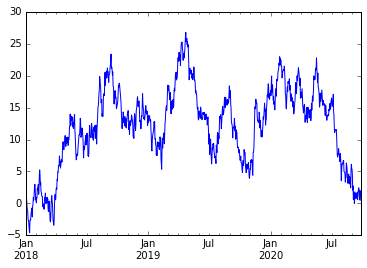

In [65]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2018', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

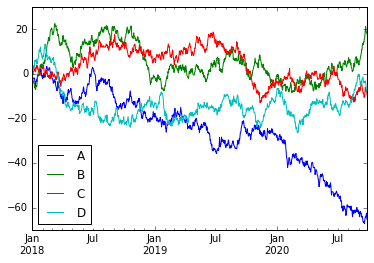

In [66]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
               columns=['A', 'B', 'C', 'D'])
   
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best') 
plt.show()

In [68]:
df[0:5].to_csv('foo.csv')
pd.read_csv('foo.csv') 

,Unnamed: 0,A,B,C,D
0,2018-01-01,-0.155349,-2.621849,0.491670,0.073091
1,2018-01-02,-1.423616,-1.302518,-0.507818,-0.302252
2,2018-01-03,-1.764934,-1.972414,-0.490481,1.763946
3,2018-01-04,-2.121055,-3.171750,1.089752,1.957761
4,2018-01-05,-1.966997,-3.750172,1.162300,1.800254


In [66]:
#df.to_hdf('foo.h5','df')
#pd.read_hdf('foo.h5','df')

In [68]:
#df.to_excel('foo.xlsx', sheet_name='Sheet1')
#pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

## Classify the functions


### Import the data

The following methods can import data from various sources.
- pd.read_csv(filename)
- pd.read_table(filename)
- pd.read_excel(filename)
- pd.read_sql(query, connection_object)
- pd.read_json(json_string)
- pd.read_html(url)
- pd.read_clipboard()
- pd.DataFrame(dict)

### Check, view the data

- df.dtypes
- df.head(n)
- df.tail(n)
- df.shape()
- df.info()
- df.columns
- df.describe()
- s.value_counts(dropna=False)
- df.apply(pd.Series.value_counts)

### Clean the data

- df.columns = ['a','b','c']
- pd.isnull()
- pd.notnull()
- df.dropna()
- df.dropna(axis=1)
- df.dropna(axis=1,thresh=n)
- df.fillna(x)
- s.astype(float)
- s.replace(1,'one')
- s.replace([1,3],['one','three'])
- df.rename(columns=lambda x: x + 1)
- df.rename(columns={'old_name': 'new_ name'})
- df.set_index('column_one')
- df.rename(index=lambda x: x + 1)
- s.str.replace('a','b')

### Process the data：Filter、Sort和GroupBy


- df[df[col] > 0.5]
- df.sort_values(col1)
- df.sort_values(col2, ascending=False)
- df.sort_values([col1,col2], ascending=[True,False])
- df.sort_index(axis=1, ascending=False)
- df.sort_values(by='B')
- df.groupby(col)
- df.groupby([col1,col2])
- df.groupby(col1)[col2]
- df.pivot_table(index=col1, values=[col2,col3], aggfunc=max)
- df.groupby(col1).agg(np.mean)
- data.apply(np.mean)
- data.apply(np.max,axis=1)

### Join the data

- df1.append(df2)
- df.concat([df1, df2],axis=1)
- df1.join(df2,on=col1,how='inner')

### Transposing THE data
- df.T

### Statistic the data

- df.describe()
- df.mean()
- df.corr()
- df.count()
- df.max()
- df.min()
- df.median()
- df.std()

### Sort and Rank
- Series.sort_index(ascending=True),method option of reindex:

　　- ffill, bfill　　　　　 
　　- pad, backfill　　　 
      
- Series.order(ascending=True)
- Series.rank(method=‘average‘, ascending=True, axis=0), method option of rank:

   - average
   - max,min
   - first
  
- df.argmax()
- df.argmin()
- df.idxmax()
- df.idxmin()

### Analysis

- df.quantile(axis=0)	
- df.sum(axis=0, skipna=True, level=NaN) 
- df.mean(axis=0, skipna=True, level=NaN)
- df.median(axis=0, skipna=True, level=NaN)
- df.mad(axis=0, skipna=True, level=NaN)
- df.var(axis=0, skipna=True, level=NaN)
- df.std(axis=0, skipna=True, level=NaN)
- df.skew(axis=0, skipna=True, level=NaN)
- df.kurt(axis=0, skipna=True, level=NaN)
- df.cumsum(axis=0, skipna=True, level=NaN)
- df.cummin(axis=0, skipna=True, level=NaN)
- df.cummax(axis=0, skipna=True, level=NaN)
- df.cumprod(axis=0, skipna=True, level=NaN)
- df.diff(axis=0) 
- df.pct_change(axis=0)

### Calculation

- df.add(df2, fill_value=NaN, axist=1)
- df.sub(df2, fill_value=NaN, axist=1)
- df.div(df2, fill_value=NaN, axist=1)
- df.mul(df2, fill_value=NaN, axist=1)
- df.apply(f, axis=0)
- df.applymap(f)
- df.cumsum(axis=0, skipna=True)

### Index, Select the data
- df[val]
- df.ix[val]
- .ix[:,val]
- df.ix[val1,val2]
- reindex
- xs
- icol,irow
- .at
- .iat
- .loc
- .iloc
- get_value,set_value